# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_1samp
from sklearn.metrics import auc

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents. Load the data from [here](https://drive.google.com/file/d/1AmdvTSj5Fl86i4uHiOnZPFg8S8mAIreA/view?usp=sharing) and place it in the data folder

In [143]:
# Your code here:
salaries = pd.read_csv("../data/Current_Employee_Names__Salaries__and_Position_Titles.csv",sep=",")
salaries.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [145]:
# Your code here:
missing_percentages=(salaries.isnull().sum()/len(salaries))*100
print(missing_percentages)

Name                  0.000000
Job Titles            0.000000
Department            0.000000
Full or Part-Time     0.000000
Salary or Hourly      0.000000
Typical Hours        75.824971
Annual Salary        24.175029
Hourly Rate          75.824971
dtype: float64


Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [144]:
salaries.shape

(33183, 8)

In [146]:
# Your code here:
salary_len = len(salaries[salaries["Salary or Hourly"]=="Salary"])
salary = salaries.loc[salaries["Salary or Hourly"]=="Salary"]
hourly_len = len(salaries[salaries["Salary or Hourly"]=="Hourly"])
hourly = salaries.loc[salaries["Salary or Hourly"]=="Hourly"]
print(f"Salaried employees #: {salary_len} \nHourly Employees #: {hourly_len}")

# Quick check
salary_len + hourly_len == salaries.shape[0]

Salaried employees #: 25161 
Hourly Employees #: 8022


True

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [155]:
# Your code here:
employee_per_dpt = pd.pivot_table(salaries,values="Name",index="Department",aggfunc="count").sort_values(by="Name",ascending=False)
                                

#employee_per_dpt = salaries.groupby(["Department"])[["Name"]].count().sort_values(by="Name",
#                                                                                  ascending=False)
employee_per_dpt

,Name
Department,
POLICE,13414
FIRE,4641
STREETS & SAN,2198
OEMC,2102
WATER MGMNT,1879
AVIATION,1629
TRANSPORTN,1140
PUBLIC LIBRARY,1015
GENERAL SERVICES,980


# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

z_score:  41.93735781905334
Alpha Left Tail:  -1.9599639845400545
Alpha Right Tail:  1.959963984540054
t-value:  20.6198057854942
p-value:  4.3230240486229894e-92


'\nIndeed, since the p-value is extremely low, we can reject the null hypothesis.\n'

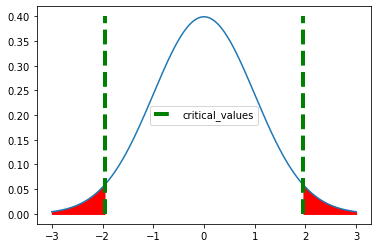

In [195]:
# Your code here:
'''
Hypothesis 0: 1 hour = 30$
Hypothesis 1: 1 hour != 30$
'''
salaries_hourly_rate = hourly.loc[:,"Hourly Rate"]

# computing variables
confidence_level = 0.95
alpha = 1 - confidence_level
mu = 30
sample_mean = salaries_hourly_rate.mean()
sample_std = salaries["Hourly Rate"].std()
sample_size = len(salaries["Hourly Rate"])
margin_of_error = sample_std/np.sqrt(sample_size)

# computing z-score
z_score = (sample_mean - null_mean) / margin_of_error
print("z_score: ",z_score)

# Two-sided hypothesis testing
alpha_left = 0.025
alpha_left = normal.ppf(alpha_left)
print("Alpha Left Tail: ",alpha_left)

alpha_right = 1 - 0.025
alpha_right = normal.ppf(alpha_right)
print('Alpha Right Tail: ', alpha_right) 

#drawing the graph

normal = norm(loc = 0, scale = 1) 
fig, ax = plt.subplots(1,1)
x = np.linspace(-3,3,1000)
y = normal.pdf(x)
ax.plot(x,y)
plt.plot([alpha_right, alpha_right], [0, 0.4], 'k--', lw=4, color='g',label="critical_values")
plt.legend(loc="center")
plt.plot([alpha_left, alpha_left], [0, 0.4], 'k--', lw=4, color='g')
plt.fill_between(x,y, where = x >= alpha_right, color='r')
plt.fill_between(x,y, where = x <=alpha_left, color='r')

'''
Seeing that Z-score is way further than critical values in with-in rejection area, we can safely 
say that there is enough evidence to reject null hypothesis and accept alternative hypothesis.

Which means that e hourly wage of all hourly workers is not equal to $30/h
'''

# Double checking
t,p = stats.ttest_1samp(salaries_hourly_rate, mu)
print("t-value: ",t)
print("p-value: ",p)
'''
Indeed, since the p-value is extremely low, we can reject the null hypothesis.
'''

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

z_score:  3.081997005712994
alpha: 1.6448536269514722
t-value:  3.081997005712994
p-value:  0.0010301701775482569


"\nWell, according to t-test results, since p-value (0.02) is much smaller than confidence level (0.05),\nwe will reject Null Hypothesis and will accept Alternative Hypothesis which is implying that\npolice officers annually mean salary is higher than 86.000.\n\nBut I don't understand why z-score is with-in non-rejection region in this case. It should be with-in \nthe red area..\n"

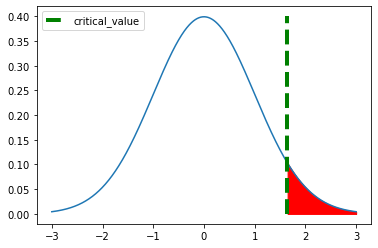

In [221]:
'''
Null Hypo: mean salaries = 86.000
Alt. Hypo: mean salaries > 86.000
'''
# Your code here:

police_dpt = salaries[(salaries["Department"]=="POLICE")&(salaries["Salary or Hourly"]=="Salary")]
police_dpt_salaries = police_dpt.loc[:,"Annual Salary"]
alpha = 0.05
mu = 86000
sample_mean = police_dpt_salaries.mean()
sample_std = police_dpt_salaries.std()
sample_size = len(police_dpt_salaries)
margin_of_error = sample_std / np.sqrt(sample_size)

#calculating z-score
z_score = (sample_mean - mu) / margin_of_error
print("z_score: ",z_score)


# One-sided Hypothesis testing
alpha = 1 - alpha
alpha = norm.ppf(alpha)
print("alpha:",alpha)

# Drawing Graph
normal = norm(loc = 0, scale = 1) 
fig, ax = plt.subplots(1,1)
x = np.linspace(-3,3,1000)
y = normal.pdf(x)
ax.plot(x,y)

plt.plot([alpha, alpha], [0, 0.4], 'k--', lw=4, color='g',label="critical_value")
plt.fill_between(x,y, where = x >alpha, color='r')
plt.legend()

'''
Well, our z-score(3.081) is with-in rejection area (red area) since rejection area starts with
critical value of 1.64. Therefore, we can say that we have enough evidence to reject null hypothesis
and accept alternative hypothesis.
'''

# Double checking
t,p = stats.ttest_1samp(police_dpt_salaries, mu)
print("t-value: ",t)
print("p-value: ",p/2) # Divide by two since one-tailed.

'''
Well, according to t-test results, since p-value (0.02) is much smaller than confidence level (0.05),
we will reject Null Hypothesis and will accept Alternative Hypothesis which is implying that
police officers annually mean salary is higher than 86.000.
'''

Using the `crosstab` function, find the department that has the most hourly workers. 

In [10]:
# Your code here:

c_tab = pd.crosstab(index=salaries["Department"],
            columns=salaries["Salary or Hourly"]).sort_values(by="Hourly",ascending=False)

#pd.pivot_table(salaries,columns="Department",values="Name",aggfunc="count").T

print(f"{c_tab.reset_index().iloc[0,0]} has the most hourly employees")

STREETS & SAN has the most hourly employees


The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [222]:
'''
Null Hypo: hourly wage = 35
Alt. Hypo: hourly wage < 35
'''
# Your code here:
streets_san=salaries.loc[(salaries["Department"]=="STREETS & SAN") & 
                         (salaries["Salary or Hourly"]=="Hourly")]

streets_san_hourly =salaries.loc[(salaries["Department"]=="STREETS & SAN") & 
                         (salaries["Salary or Hourly"]=="Hourly")]["Hourly Rate"]

mu = 35
sample_mean = streets_san["Hourly Rate"].mean()
sample_std = streets_san["Hourly Rate"].std()
sample_size= len(streets_san)
DoF = sample_size - 1 
error = sample_std / np.sqrt(sample_size)
alpha = 1 - 0.95  # for 95% confidence level

# computing t-value
t_value = (sample_mean - mu) / (sample_std/np.sqrt(sample_size))
print("t-value : ",t_value)


# One-sided Hypothesis testing
alpha =  0.05
alpha = norm.ppf(alpha)
print("alpha:",alpha)

'''
Since t-value is with-in the rejection region with score of -9.56, we can say that we have enough
evidence to reject null hypothesis & accept alternative hypothesis.
Our critical value starts from -1.64 for rejection area.
'''

print('\n')
# Double checking
t,p = stats.ttest_1samp(streets_san_hourly,mu)
print("t:",t)
print("p",p/2)

t-value :  -9.567447887848152
alpha: -1.6448536269514729


t: -9.567447887848152
p 1.6689265282353859e-21


# Challenge 3: To practice - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [254]:
# Your code here:
# computing variables
data_hourly = salaries[salaries["Salary or Hourly"]=="Hourly"]
data = data_hourly["Hourly Rate"]

confidence_level = 0.95
DoF = len(data)-1
sample_mean = data.mean()
sample_std = data.std()

standard_error = stats.sem(data)
t = stats.t.interval(confidence_level,DoF)[1]

lower,upper = ((sample_mean - (t * standard_error)),(sample_mean + (t*standard_error)))
print(f"With cofidence level of 95%, confidence interval for the hourly wage of employees are in between {lower} and {upper}.")

With cofidence level of 95%, confidence interval for the hourly wage of employees are in between 32.52345834488425 and 33.05365708767623.


Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [259]:
# Your code here:
# below ones are alrady filtered above.
police_dpt = salaries[(salaries["Department"]=="POLICE") & (salaries["Salary or Hourly"]=="Salary")]
police_dpt_salaries = police_dpt.loc[:,"Annual Salary"]
data = police_dpt_salaries

#computing variables
confidence_level = 0.95
DoF = len(data)-1
sample_mean = data.mean()
sample_std = data.std()

standard_error = stats.sem(data)
t = stats.t.interval(confidence_level,DoF)[1]

lower,upper = ((sample_mean - (t * standard_error)),(sample_mean + (t*standard_error)))
print(f"With cofidence level of 95%, confidence interval for the hourly wage of employees are in between {lower} and {upper}.")

With cofidence level of 95%, confidence interval for the hourly wage of employees are in between 86177.05631531784 and 86795.77269094894.


In [ ]:
'''
After watching & reading more than 15 hours about statistics this week :D I believe I finally
understood the logic ofconfidence intervals, hypothesis tests, z/t values etc. I will double check 
solutions if any point is wrong. 

Thanks Paolo!
'''

# Bonus Challenge - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [268]:
# Your code here:
'''
Null hypothesis: hourly workers = 25%
Alt. hypothesis: hourly workers != 25%
'''
data = salaries[(salaries["Salary or Hourly"]=="Hourly")]
sample_proportion = len(data)/len(salaries)  #where salaries is the whole dataset.
hypo_proportion = 0.25
sample_size = len(salaries)

z_score = (sample_proportion - hypo_proportion) / np.sqrt((0.25*0.75)/sample_size)
print(z_score)

# Two tail hypothesis testing

normal = norm(loc=0,scale=1)
alpha = 0.05
alpha_left = 0.05/2
alpha_left = normal.ppf(alpha_left)
print("alpha_left: ",alpha_left)
alpha_right = 1 - 0.025
alpha_right = normal.ppf(alpha_right)
print("alpha_right: ",alpha_right)

'''
Since our z-score is beyond the critical alpha right value, it is with-in rejection area, therefore
we can say that we have enough evidence to reject null hypothesis and accept alternative hypothesis.

As a result, hourly workers in City of Chicago is different than 25% at 95% confidence level.
'''

-3.470528924426208
alpha_left:  -1.9599639845400545
alpha_right:  1.959963984540054
